# BÁO CÁO CUỐI KỲ

---

<div align="justify">

* XÂY DỰNG HỆ THỐNG ỨNG DỤNG MÔ HÌNH DEEP LEARNING - **YOLO** ĐỂ **PHÁT HIỆN ĐỐI TƯỢNG TRONG ẢNH** (OBJECT DETECTION IN IMAGES)

</div>

---


* Thực hiện: Nguyễn Phú Sang
* Mssv: 21023391
* Môn học: Thị giác máy tính và ứng dụng (Computer vision)
* Gvhd: ThS Võ Quang Hoàng Khang






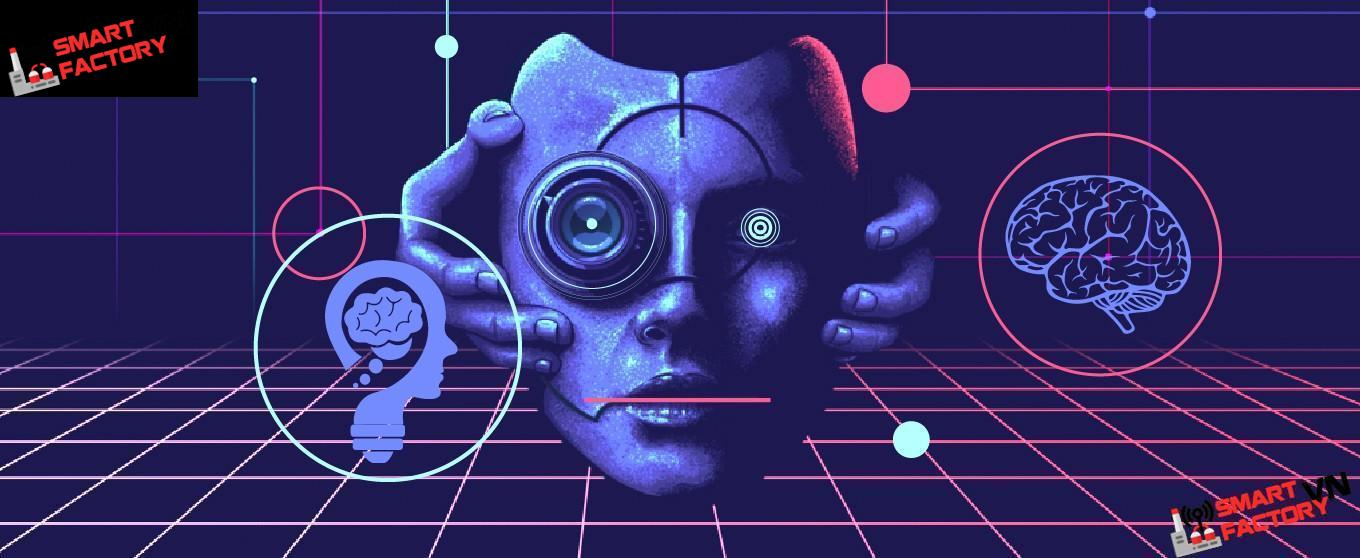

---



# MÔ TẢ BÀI TOÁN


---

<div align="justify">

* Trong thời đại công nghệ số, bài toán phát hiện đối tượng (Object Detection) ngày càng trở nên quan trọng trong nhiều lĩnh vực như giám sát an ninh, xe tự hành, robot, y tế, và nông nghiệp thông minh. Đặc biệt, việc phát hiện đối tượng với độ chính xác cao trong các bối cảnh phức tạp và ở nhiều kích thước khác nhau là một thách thức lớn.

* YOLO (You Only Look Once) là một trong những mô hình nổi bật trong lĩnh vực phát hiện đối tượng nhờ vào khả năng phát hiện nhanh, thời gian xử lý theo thời gian thực và độ chính xác khá tốt. Tuy nhiên, mô hình YOLO truyền thống gặp khó khăn khi xử lý các đối tượng nhỏ hoặc đối tượng ở nhiều tỉ lệ kích thước khác nhau trong cùng một ảnh.

* Để giải quyết hạn chế này, kiến trúc Feature Pyramid Network (FPN) đã được nghiên cứu và tích hợp. FPN có khả năng khai thác đặc trưng ở nhiều mức độ (low-level đến high-level features), từ đó cải thiện khả năng phát hiện đối tượng ở nhiều tỉ lệ và kích thước khác nhau.

* Đề tài này hướng tới việc xây dựng một hệ thống hoàn chỉnh ứng dụng mô hình YOLO kết hợp với kiến trúc FPN, nhằm nâng cao hiệu suất phát hiện đối tượng trong ảnh. Hệ thống bao gồm các bước như thu thập và tiền xử lý dữ liệu, huấn luyện mô hình, đánh giá hiệu suất, và triển khai hệ thống phát hiện theo thời gian thực hoặc trên tập ảnh.



</div>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import os
import shutil
import xml.etree.ElementTree as ET
from collections import defaultdict
from PIL import Image
from collections import Counter
from glob import glob
from pprint import pprint


---

# CHUẨN BỊ DỮ LIỆU

---

* Định nghĩa đường dẫn dữ liệu

In [ ]:
data_dir = '/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Dataset-voc2012/VOC-2012'
yolo_dataset_path = '/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Dataset-voc2012/YOLO-DATASET'

* Tạo thư mục yolo_dataset

In [ ]:
yolo_dirs = [
    os.path.join(yolo_dataset_path, 'images', 'train'),
    os.path.join(yolo_dataset_path, 'images', 'val'),
    os.path.join(yolo_dataset_path, 'labels', 'train'),
    os.path.join(yolo_dataset_path, 'labels', 'val')
]

for yolo_dir in yolo_dirs:
    os.makedirs(yolo_dir, exist_ok=True)

* Kiểm tra thư mục đã tồn tại

In [ ]:
images_dir = os.path.join(data_dir, 'JPEGImages')
annotations_dir = os.path.join(data_dir, 'Annotations')

if not os.path.exists(images_dir) or not os.path.exists(annotations_dir):
    raise FileNotFoundError(f"The directory {images_dir} or {annotations_dir} does not exist. Please verify the dataset path.")
image_filenames = os.listdir(images_dir)

image_ids = [os.path.splitext(filename)[0] for filename in image_filenames if filename.endswith('.jpg')]

* Load annotation (XML) và tạo danh sách thông tin ảnh

In [ ]:
def parse_voc_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    filename = root.find("filename").text
    size = root.find("size")
    width = int(size.find("width").text)
    height = int(size.find("height").text)

    objects = []
    for obj in root.findall("object"):
        label = obj.find("name").text
        bbox = obj.find("bndbox")
        xmin = int(float(bbox.find("xmin").text))
        ymin = int(float(bbox.find("ymin").text))
        xmax = int(float(bbox.find("xmax").text))
        ymax = int(float(bbox.find("ymax").text))
        objects.append({
            "label": label,
            "bbox": [xmin, ymin, xmax, ymax]
        })

    return {
        "filename": filename,
        "width": width,
        "height": height,
        "objects": objects
    }

In [ ]:
def load_annotations(annotation_dir):
    annotation_files = glob(os.path.join(annotation_dir, "*.xml"))
    data = []

    for xml_file in annotation_files:
        parsed_data = parse_voc_annotation(xml_file)
        data.append(parsed_data)

    return data

In [ ]:
# Load dữ liệu
annotations_list = load_annotations(annotations_dir)
pprint(annotations_list[0])

{'filename': '2008_000435.jpg',
 'height': 335,
 'objects': [{'bbox': [1, 237, 447, 335], 'label': 'diningtable'},
             {'bbox': [78, 36, 218, 240], 'label': 'person'},
             {'bbox': [200, 12, 389, 243], 'label': 'person'},
             {'bbox': [164, 174, 255, 246], 'label': 'person'}],
 'width': 447}




---


# KHÁM PHÁ DỮ LIỆU


---



\* Kiểm tra số lượng ảnh và tệp annotation có trong bộ dữ liệu

In [ ]:
num_images = len(os.listdir(images_dir))
num_annotations = len(os.listdir(annotations_dir))

print(f"Số lượng ảnh: {num_images}")
print(f"Số lượng annotation: {num_annotations}")

Số lượng ảnh: 17125
Số lượng annotation: 17125


* Thống kê các đối tượng trong ảnh

In [ ]:
# Tạo một danh sách chứa tất cả các label
all_labels = []
for annotation in annotations_list:
    for obj in annotation['objects']:
        all_labels.append(obj['label'])

# Đếm số lần xuất hiện của mỗi label
label_counts = Counter(all_labels)

# In ra các label và số lần xuất hiện
print("Các label trong dữ liệu:")
for label, count in label_counts.items():
    print(f"- {label}: {count}")

Các label trong dữ liệu:
- diningtable: 800
- person: 17401
- chair: 3056
- boat: 1059
- car: 2492
- bottle: 1561
- motorbike: 801
- sofa: 841
- cat: 1277
- bird: 1271
- horse: 803
- dog: 1598
- tvmonitor: 893
- train: 704
- aeroplane: 1002
- pottedplant: 1202
- cow: 771
- bus: 685
- sheep: 1084
- bicycle: 837




---


# VISUALIZE DỮ LIỆU


---




* Phân phối số lượng đối tượng trên mỗi ảnh

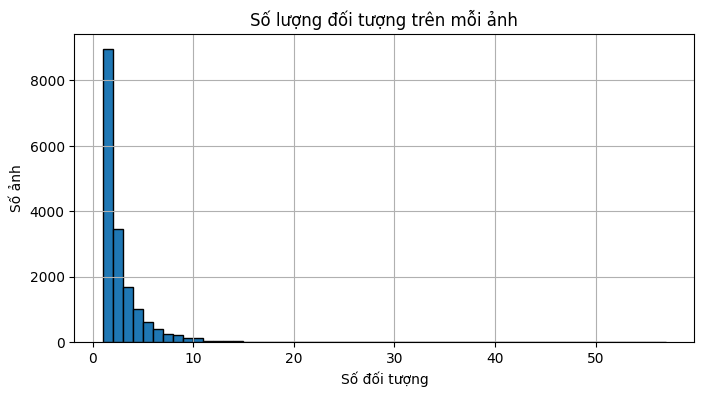

Trung bình: 2.34 đối tượng/ảnh
Số ảnh không có object: 0
Max object/ảnh: 56


In [ ]:
object_counts = [len(a['objects']) for a in annotations_list]
plt.figure(figsize=(8,4))
plt.hist(object_counts, bins=range(1, max(object_counts)+2), edgecolor='black')
plt.title("Số lượng đối tượng trên mỗi ảnh")
plt.xlabel("Số đối tượng")
plt.ylabel("Số ảnh")
plt.grid(True)
plt.show()

print(f"Trung bình: {np.mean(object_counts):.2f} đối tượng/ảnh")
print(f"Số ảnh không có object: {sum([c==0 for c in object_counts])}")
print(f"Max object/ảnh: {max(object_counts)}")

* Phân phối kích thước ảnh

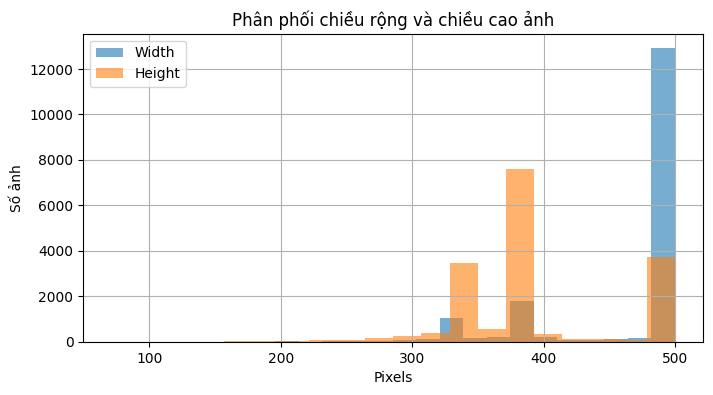

Min width: 142, Max: 500, Mean: 466.8
Min height: 71, Max: 500, Mean: 389.5


In [ ]:
widths = [ann['width'] for ann in annotations_list]
heights = [ann['height'] for ann in annotations_list]

plt.figure(figsize=(8,4))
plt.hist(widths, bins=20, alpha=0.6, label='Width')
plt.hist(heights, bins=20, alpha=0.6, label='Height')
plt.legend()
plt.title("Phân phối chiều rộng và chiều cao ảnh")
plt.xlabel("Pixels")
plt.ylabel("Số ảnh")
plt.grid(True)
plt.show()

print(f"Min width: {min(widths)}, Max: {max(widths)}, Mean: {np.mean(widths):.1f}")
print(f"Min height: {min(heights)}, Max: {max(heights)}, Mean: {np.mean(heights):.1f}")

* Phân phối tỷ lệ khung hình (Aspect Ratio)

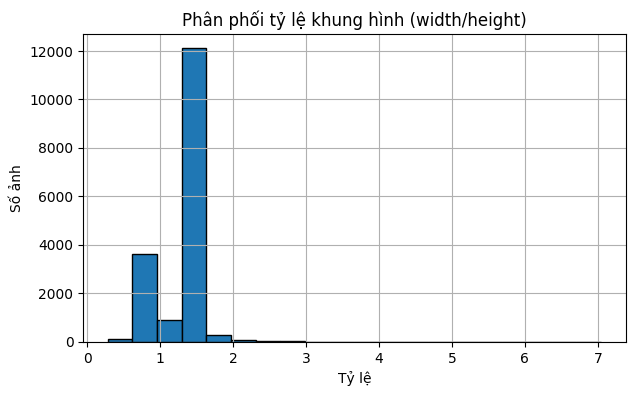

In [ ]:
ratios = [w / h for w, h in zip(widths, heights)]

plt.figure(figsize=(7,4))
plt.hist(ratios, bins=20, edgecolor='black')
plt.title("Phân phối tỷ lệ khung hình (width/height)")
plt.xlabel("Tỷ lệ")
plt.ylabel("Số ảnh")
plt.grid(True)
plt.show()

* Phân phối tần suất các lớp đối tượng

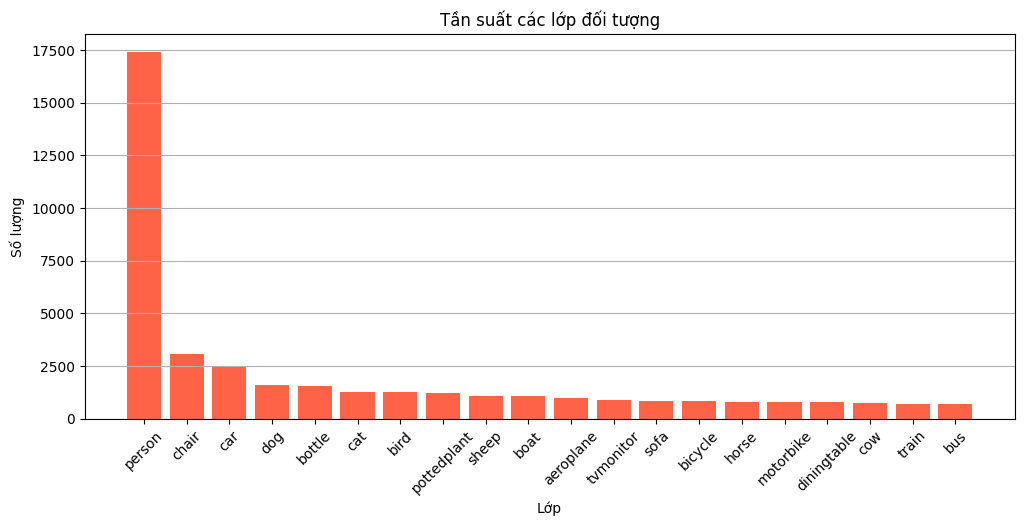

In [ ]:
from collections import defaultdict

label_counts = defaultdict(int)
for ann in annotations_list:
    for obj in ann['objects']:
        label_counts[obj['label']] += 1

# Sắp xếp theo số lượng giảm dần
sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

plt.figure(figsize=(12,5))
plt.bar(*zip(*sorted_labels), color='tomato')
plt.xticks(rotation=45)
plt.title("Tần suất các lớp đối tượng")
plt.xlabel("Lớp")
plt.ylabel("Số lượng")
plt.grid(axis='y')
plt.show()

* Phân tích kích thước bbox

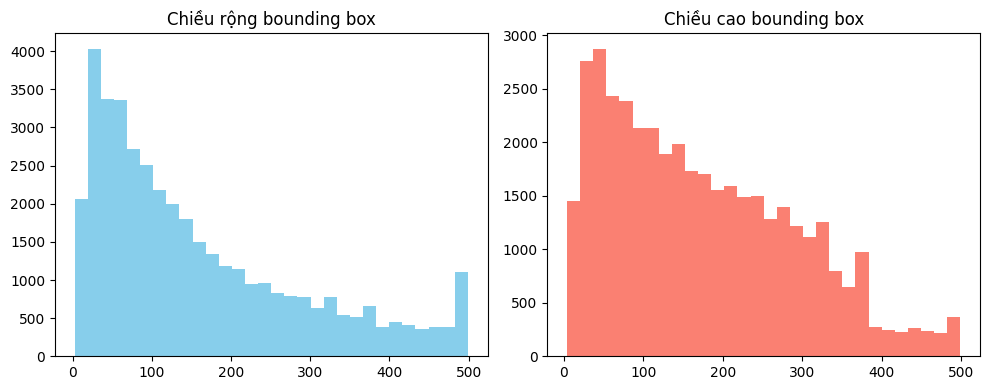

Trung bình bbox width: 158.5, height: 173.3


In [ ]:
bbox_widths = []
bbox_heights = []
for ann in annotations_list:
    for obj in ann['objects']:
        xmin, ymin, xmax, ymax = obj['bbox']
        bbox_widths.append(xmax - xmin)
        bbox_heights.append(ymax - ymin)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(bbox_widths, bins=30, color='skyblue')
plt.title("Chiều rộng bounding box")

plt.subplot(1,2,2)
plt.hist(bbox_heights, bins=30, color='salmon')
plt.title("Chiều cao bounding box")

plt.tight_layout()
plt.show()

print(f"Trung bình bbox width: {np.mean(bbox_widths):.1f}, height: {np.mean(bbox_heights):.1f}")

* Phát hiện vấn đề bất thường (nếu có)
  
  1. Bounding box có kích thước bằng 0 hoặc âm
  2. Ảnh không chứa object
  3. Object nằm ngoài kích thước ảnh

In [ ]:
invalid_boxes = 0
for ann in annotations_list:
    for obj in ann['objects']:
        xmin, ymin, xmax, ymax = obj['bbox']
        if xmax <= xmin or ymax <= ymin:
            invalid_boxes += 1
print(f"Số bounding box không hợp lệ: {invalid_boxes}")

Số bounding box không hợp lệ: 0


* Hiển thị ảnh kèm Bounding Boxes

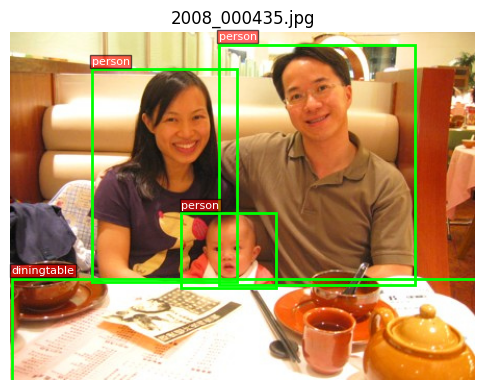

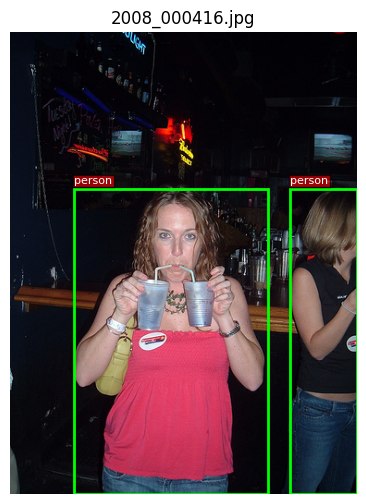

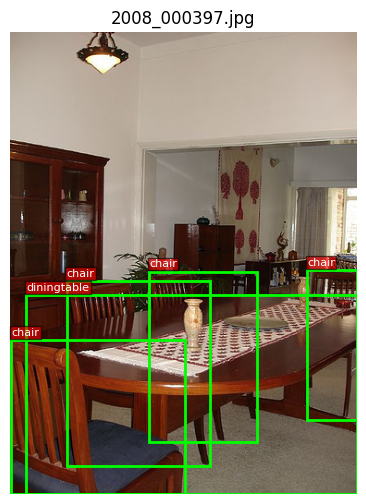

In [ ]:
def show_image_with_boxes(annotation):
    image_file = os.path.join(images_dir, annotation['filename'])
    image = Image.open(image_file)

    plt.figure(figsize=(6,6))
    plt.imshow(image)
    ax = plt.gca()

    for obj in annotation['objects']:
        xmin, ymin, xmax, ymax = obj['bbox']
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin,
                                   edgecolor='lime', facecolor='none', lw=2))
        ax.text(xmin, ymin - 5, obj['label'], color='white',
                fontsize=8, bbox=dict(facecolor='red', alpha=0.6, pad=1))

    plt.axis('off')
    plt.title(annotation['filename'])
    plt.show()

# Hiển thị 3 ảnh đầu
for i in range(3):
    show_image_with_boxes(annotations_list[i])



---

# MÃ HÓA NHÃN



---



In [ ]:
labels = sorted(list(label_counts.keys()))
label_dict = {label: i for i, label in enumerate(labels)}

print("Từ điển ánh xạ nhãn sang số nguyên:")
for label, idx in label_dict.items():
    print(f"- {label}: {idx}")

Từ điển ánh xạ nhãn sang số nguyên:
- aeroplane: 0
- bicycle: 1
- bird: 2
- boat: 3
- bottle: 4
- bus: 5
- car: 6
- cat: 7
- chair: 8
- cow: 9
- diningtable: 10
- dog: 11
- horse: 12
- motorbike: 13
- person: 14
- pottedplant: 15
- sheep: 16
- sofa: 17
- train: 18
- tvmonitor: 19




---

# CHUYỂN ĐỔI ANNOTATIONS PASCAL_VOC SANG ĐỊNH DẠNG YOLO


---



In [ ]:
def create_yolo_annotation(xml_file_path, yolo_label_path, label_dict):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    annotations = []

    img_width = int(root.find('size/width').text)
    img_height = int(root.find('size/height').text)

    for obj in root.findall('object'):
        label = obj.find('name').text
        if label not in label_dict:
            continue
        label_idx = label_dict[label]
        bndbox = obj.find('bndbox')
        xmin = float(bndbox.find('xmin').text)
        ymin = float(bndbox.find('ymin').text)
        xmax = float(bndbox.find('xmax').text)
        ymax = float(bndbox.find('ymax').text)

        x_center = ((xmin + xmax) / 2) / img_width
        y_center = ((ymin + ymax) / 2) / img_height
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        annotations.append(f"{label_idx} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    with open(yolo_label_path, 'w') as f:
        f.write("\n".join(annotations))



---

# PHÂN TÁCH DỮ LIỆU TRAIN, VAL VỚI TỈ LỆ 8:2


---



In [ ]:
random.seed(42)
random.shuffle(image_ids)
split_index = int(0.8 * len(image_ids))
train_ids = image_ids[:split_index]
val_ids = image_ids[split_index:]

In [ ]:
print(f"Số lượng ảnh train: {len(train_ids)}")
print(f"Số lượng ảnh validation: {len(val_ids)}")

Số lượng ảnh train: 13700
Số lượng ảnh validation: 3425




---

# LẶP QUA DATASET ĐỂ CHIA DỮ LIỆU THÀNH TẬP ĐÀO TẠO VÀ XÁC THỰC



---



In [ ]:
for image_set, ids in [('train', train_ids), ('val', val_ids)]:
    for img_id in ids:
        img_src_path = os.path.join(images_dir, f'{img_id}.jpg')
        label_dst_path = os.path.join(yolo_dataset_path, 'labels', image_set, f'{img_id}.txt')

        xml_file_path = os.path.join(annotations_dir, f'{img_id}.xml')
        if not os.path.exists(xml_file_path):
            print(f"Warning: Annotation {xml_file_path} not found, skipping.")
            continue
        create_yolo_annotation(xml_file_path, label_dst_path, label_dict)

        img_dst_path = os.path.join(yolo_dataset_path, 'images', image_set, f'{img_id}.jpg')
        shutil.copy(img_src_path, img_dst_path)



---

# CẤU HÌNH CẤU TRÚC BỘ DỮ LIỆU TRONG TỆP data.yaml

---



In [ ]:
yaml_content = f"""
train: {os.path.join(yolo_dataset_path, 'images/train')}
val: {os.path.join(yolo_dataset_path, 'images/val')}

nc: {len(label_dict)}
names: {list(label_dict.keys())}
"""

with open(os.path.join(yolo_dataset_path, 'data.yaml'), 'w') as f:
    f.write(yaml_content)



---

# MÔ HÌNH

---



* Tải mô hình yolov8 với backbone có FPN + PAN

In [ ]:
from ultralytics import YOLO

# Tải mô hình yolov8
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 17.9MB/s]


In [ ]:
model.export(format='onnx')

Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 277.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.2/146.2 kB 264.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 290.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 161.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 217.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.6s, ins

'yolov8n.onnx'

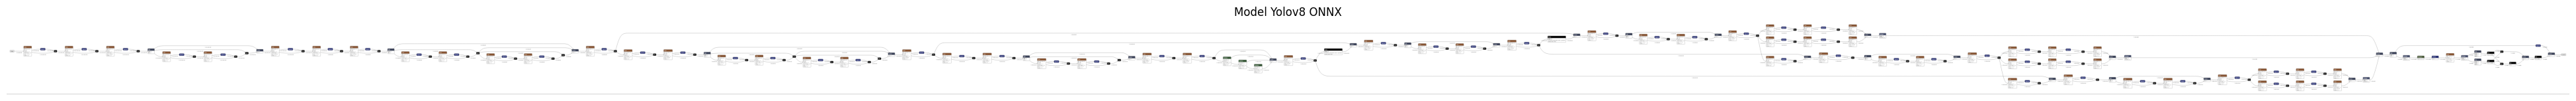

In [ ]:
import cv2
model_onnx = cv2.imread('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolov8n.onnx.png')
fig, axis = plt.subplots(figsize=(50, 50))
axis.imshow(model_onnx)
axis.set_title('Model Yolov8 ONNX')
axis.axis('off')
plt.show()

* Huấn luyện mô hình

In [ ]:
import time
start_time = time.time()

model.train(
    data=os.path.join(yolo_dataset_path, 'data.yaml'),
    epochs=5,
    imgsz=320,
    batch=32,
    name='yolov8_pascal_voc2012'
)
end_time = time.time()
print(f"Thời gian huấn luyện: {end_time - start_time:.2f} giây")

New https://pypi.org/project/ultralytics/8.3.135 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Dataset-voc2012/YOLO-DATASET/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_sc

100%|██████████| 755k/755k [00:00<00:00, 72.2MB/s]

Overriding model.yaml nc=80 with nc=20

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,014,748 parameters, 3,014,732 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
train: Fast image access ✅ (ping: 0.7±0.1 ms, read: 16.0±13.3 MB/s, size: 98.2 KB)


train: Scanning /content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Dataset-voc2012/YOLO-DATASET/labels/train.cache... 16429 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16429/16429 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 12.5±17.1 MB/s, size: 84.3 KB)


val: Scanning /content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Dataset-voc2012/YOLO-DATASET/labels/val.cache... 6154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6154/6154 [00:00<?, ?it/s]

Plotting labels to runs/detect/yolov8_pascal_voc2012/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000417, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8_pascal_voc2012
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.157      2.662       1.24         65        320: 100%|██████████| 514/514 [1:03:18<00:00,  7.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [32:04<00:00, 19.84s/it]


                   all       6154      14355      0.599        0.5      0.522      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.139      1.726      1.249         46        320: 100%|██████████| 514/514 [1:00:00<00:00,  7.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [07:40<00:00,  4.75s/it]


                   all       6154      14355      0.578      0.519      0.523      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.114       1.63      1.234         53        320: 100%|██████████| 514/514 [59:47<00:00,  6.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [07:19<00:00,  4.53s/it]


                   all       6154      14355      0.646      0.499      0.545       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.082      1.543      1.211         57        320: 100%|██████████| 514/514 [59:29<00:00,  6.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [07:19<00:00,  4.53s/it]


                   all       6154      14355      0.668      0.572      0.609      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.041      1.434      1.188         70        320: 100%|██████████| 514/514 [58:26<00:00,  6.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [07:55<00:00,  4.90s/it]


                   all       6154      14355       0.71      0.595      0.653      0.489

5 epochs completed in 6.057 hours.
Optimizer stripped from runs/detect/yolov8_pascal_voc2012/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_pascal_voc2012/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_pascal_voc2012/weights/best.pt...
Ultralytics 8.3.134 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 97/97 [06:49<00:00,  4.22s/it]


                   all       6154      14355       0.71      0.595      0.653      0.489
             aeroplane        253        346      0.878      0.728      0.806      0.654
               bicycle        235        329      0.624      0.586      0.604      0.469
                  bird        270        432      0.816      0.549      0.644      0.447
                  boat        182        350       0.69      0.411      0.495      0.323
                bottle        282        571      0.605      0.343      0.394      0.263
                   bus        154        229      0.807      0.755      0.802      0.685
                   car        470        925       0.81      0.474      0.607      0.448
                   cat        434        479      0.789      0.835      0.881      0.746
                 chair        486       1050      0.532      0.422      0.455      0.301
                   cow        120        278      0.561      0.688      0.656      0.461
           diningtabl

* Lưu mô hình

In [ ]:
model.save('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolov8n_pascal_voc2012_pro.pt')

* Đánh giá mô hình

In [ ]:
best_model = YOLO('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolov8n_pascal_voc2012_pro.pt')
metrics = best_model.val()

Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,009,548 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.13MB/s]


val: Fast image access ✅ (ping: 0.8±0.3 ms, read: 0.2±0.1 MB/s, size: 91.4 KB)


val: Scanning /content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Dataset-voc2012/YOLO-DATASET/labels/val.cache... 6154 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6154/6154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 385/385 [10:50<00:00,  1.69s/it]


                   all       6154      14355      0.712      0.594      0.653      0.489
             aeroplane        253        346      0.878      0.725      0.808      0.655
               bicycle        235        329      0.624      0.584      0.604      0.469
                  bird        270        432      0.817      0.546      0.643      0.447
                  boat        182        350      0.697      0.411      0.494      0.325
                bottle        282        571      0.604      0.342      0.394      0.264
                   bus        154        229      0.808      0.755      0.801      0.686
                   car        470        925      0.814      0.472      0.608      0.449
                   cat        434        479      0.787      0.834      0.881      0.746
                 chair        486       1050      0.533      0.423      0.454        0.3
                   cow        120        278      0.565      0.687      0.655      0.461
           diningtabl

* Chỉ số đánh giá mô hình

In [ ]:
# Lấy các chỉ số từ metrics
precision = metrics.results_dict['metrics/precision(B)']
recall = metrics.results_dict['metrics/recall(B)']
map50 = metrics.results_dict['metrics/mAP50(B)']
map5095 = metrics.results_dict['metrics/mAP50-95(B)']
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)

# In bảng kết quả
print("Bảng kết quả đánh giá mô hình:\n")
print(f"{'Chỉ số':<50}{'Giá trị'}")
print("-" * 57)
print(f"{'Độ chính xác (Precision)':<51}{precision:.4f}")
print(f"{'Độ phủ (Recall)':<51}{recall:.4f}")
print(f"{'mAP@0.5':<51}{map50:.4f}")
print(f"{'mAP@0.5:0.95':<51}{map5095:.4f}")
print(f"{'Điểm F1':<51}{f1_score:.4f}")

Bảng kết quả đánh giá mô hình:

Chỉ số                                            Giá trị
---------------------------------------------------------
Độ chính xác (Precision)                           0.7122
Độ phủ (Recall)                                    0.5940
mAP@0.5                                            0.6531
mAP@0.5:0.95                                       0.4890
Điểm F1                                            0.6478


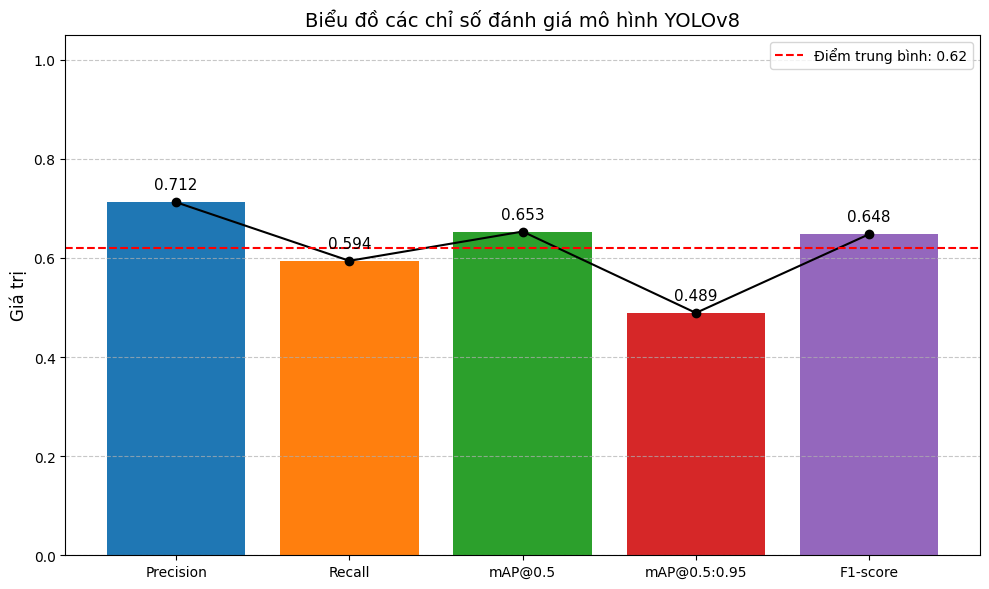

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Vẽ biểu đồ
metric_names = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95', 'F1-score']
metric_values = [precision, recall, map50, map5095, f1_score]

# Màu sắc cho từng cột
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
average_score = np.mean(metric_values)
plt.figure(figsize=(10, 6))
bars = plt.bar(metric_names, metric_values, color=colors)

# Vẽ đường nối giữa các điểm giá trị
x_positions = np.arange(len(metric_values))
plt.plot(x_positions, metric_values, color='black', marker='o', linestyle='-', linewidth=1.5, markersize=6)

plt.ylim(0, 1.05)
plt.title('Biểu đồ các chỉ số đánh giá mô hình YOLOv8', fontsize=14)
plt.ylabel('Giá trị', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Vẽ đường điểm trung bình
plt.axhline(y=average_score, color='red', linestyle='--', linewidth=1.5, label=f'Điểm trung bình: {average_score:.2f}')
plt.legend()

# Hiển thị giá trị trên từng cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.3f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# In hình ảnh kết quả
fig = plt.gcf()
fig.set_size_inches(10, 6)
fig.savefig('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolo_evaluation_metrics_all.png', bbox_inches='tight')

<ipython-input-11-b7f991727a1f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=metrics_names, y=metrics_values, palette=colors, ax=ax)


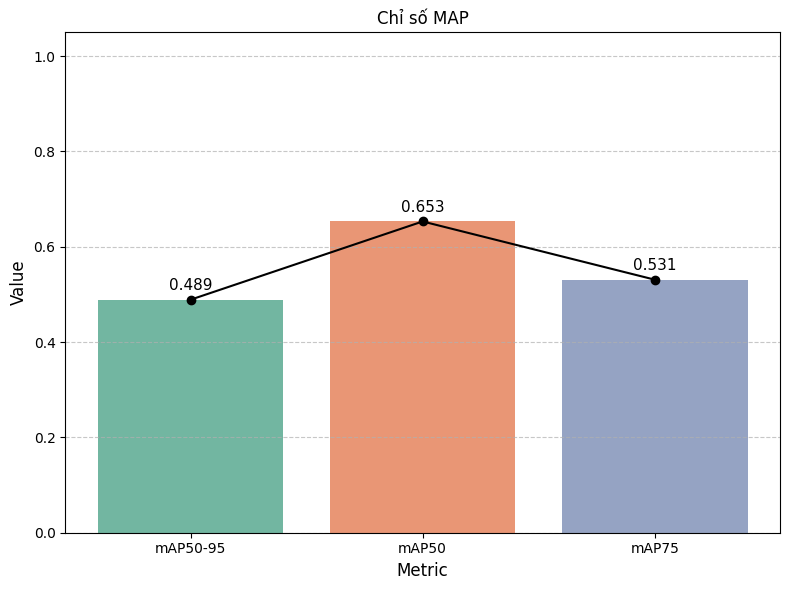

In [ ]:
metrics_names = ['mAP50-95', 'mAP50', 'mAP75']
metrics_values = [metrics.box.map, metrics.box.map50, metrics.box.map75]

# Tạo figure và axis
fig, ax = plt.subplots(figsize=(8, 6))

# Vẽ barplot với màu sắc riêng cho từng cột
colors = sns.color_palette('Set2', n_colors=len(metrics_names))
barplot = sns.barplot(x=metrics_names, y=metrics_values, palette=colors, ax=ax)

# Thêm đường nối giữa các điểm
x_positions = np.arange(len(metrics_values))
ax.plot(x_positions, metrics_values, color='black', marker='o', linestyle='-', linewidth=1.5, markersize=6)

# Thêm giá trị trên từng cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.3f}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom',
                fontsize=11,
                xytext=(0, 5),
                textcoords='offset points')

# Thiết lập tiêu đề và nhãn
ax.set_title('Chỉ số MAP', fontsize=12)
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_ylim(0, 1.05)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

# Lưu biểu đồ (thay đổi đường dẫn phù hợp với môi trường của bạn)
fig.savefig('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolo_evaluation_metrics_map.png', bbox_inches='tight')

<ipython-input-12-10852269f129>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=labels, y=precision_class, palette='Blues_d')


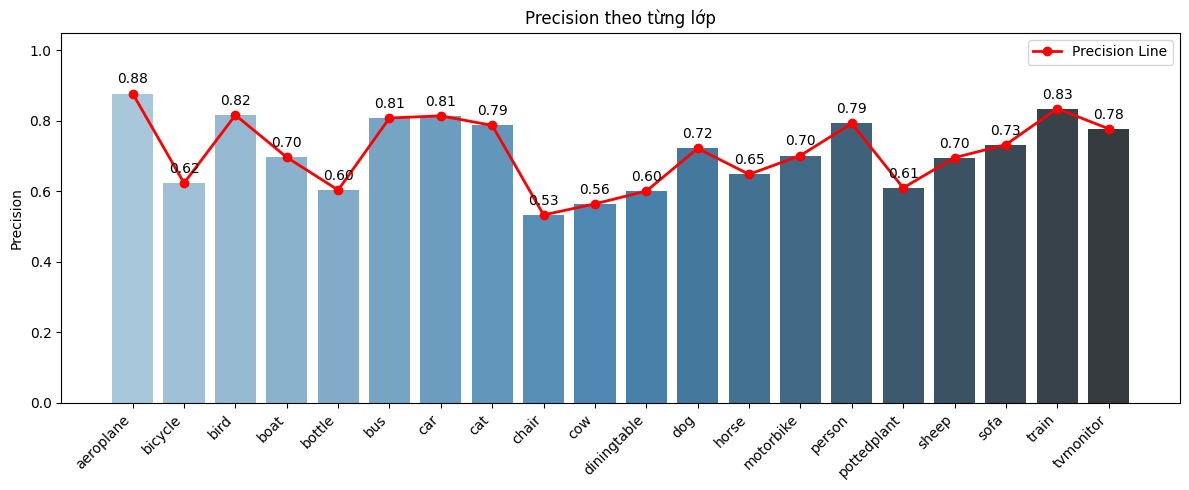

<Figure size 1200x500 with 0 Axes>

In [ ]:
class_names = best_model.names
labels = [class_names[i] for i in range(len(class_names))]

precision_class = metrics.box.p

plt.figure(figsize=(12, 5))
ax1 = sns.barplot(x=labels, y=precision_class, palette='Blues_d')
# Vẽ đường nối giữa các điểm precision
ax1.plot(range(len(precision_class)), precision_class, color='red', marker='o', linestyle='-', linewidth=2, label='Precision Line')

# Thêm giá trị trên đầu cột
for i, p in enumerate(precision_class):
    ax1.text(i, p + 0.02, f'{p:.2f}', ha='center', va='bottom')

# Tùy chỉnh trục và tiêu đề
plt.title('Precision theo từng lớp')
plt.ylabel('Precision')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Lưu ảnh
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.savefig('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolo_evaluation_metrics_precision_class.png', bbox_inches='tight')

<ipython-input-13-53b4c74cb5ba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=labels, y=recall_class, palette='Reds_d')


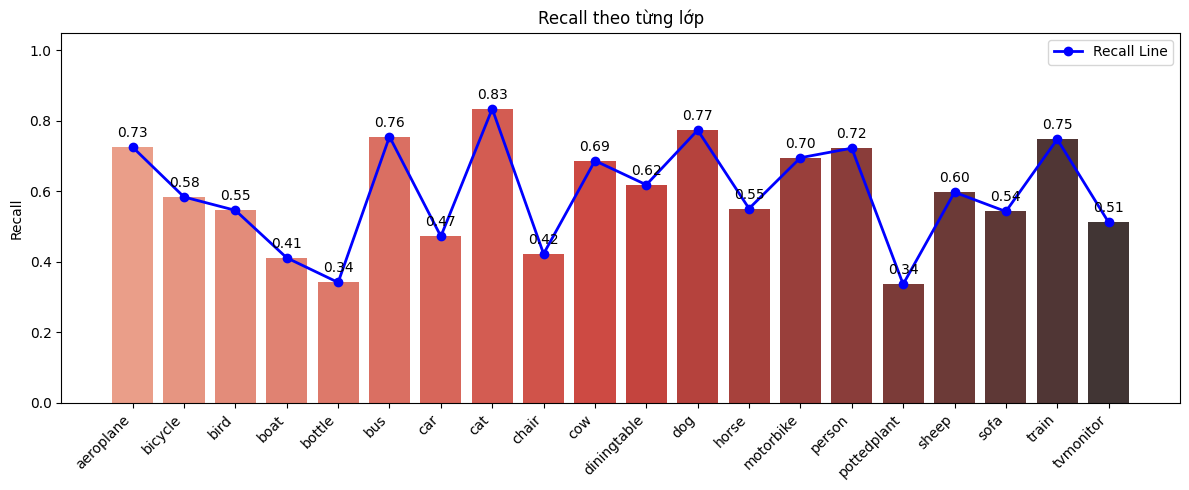

<Figure size 1200x500 with 0 Axes>

In [ ]:
recall_class = metrics.box.r

plt.figure(figsize=(12, 5))
ax1 = sns.barplot(x=labels, y=recall_class, palette='Reds_d')
# Vẽ đường nối giữa các điểm precision
ax1.plot(range(len(recall_class)), recall_class, color='blue', marker='o', linestyle='-', linewidth=2, label='Recall Line')

# Thêm giá trị trên đầu cột
for i, p in enumerate(recall_class):
    ax1.text(i, p + 0.02, f'{p:.2f}', ha='center', va='bottom')

# Tùy chỉnh trục và tiêu đề
plt.title('Recall theo từng lớp')
plt.ylabel('Recall')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Lưu ảnh
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.savefig('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolo_evaluation_metrics_recall_class.png', bbox_inches='tight')

<ipython-input-14-69ec512254b0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=map50_class, palette='Greens_d')


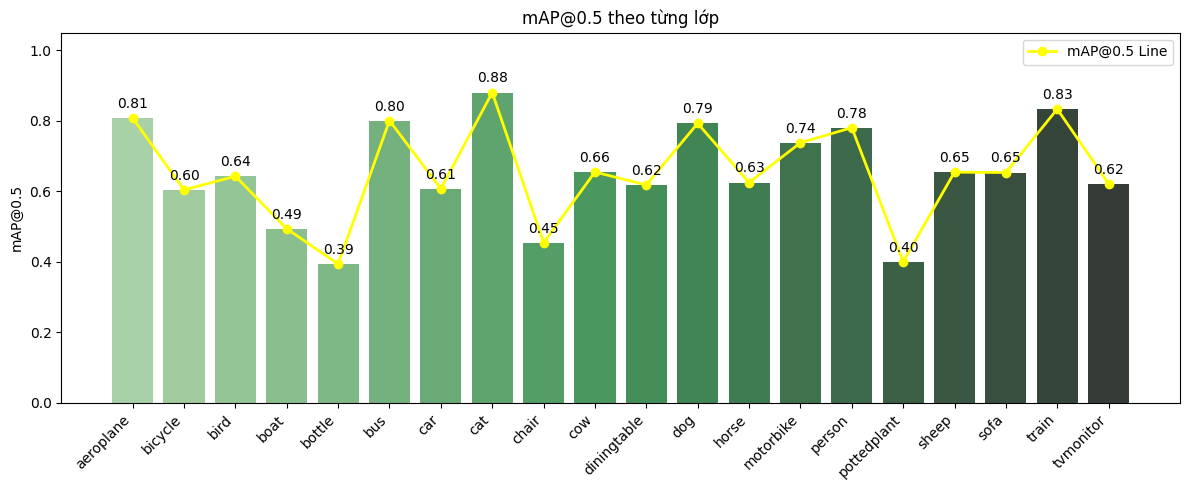

<Figure size 1200x500 with 0 Axes>

In [ ]:
# Lấy mAP@0.5 theo từng lớp
map50_class = metrics.box.ap50

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=labels, y=map50_class, palette='Greens_d')

# Vẽ đường nối
ax.plot(range(len(map50_class)), map50_class, color='yellow', marker='o', linestyle='-', linewidth=2, label='mAP@0.5 Line')

# Hiển thị giá trị trên mỗi cột
for i, v in enumerate(map50_class):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

# Tùy chỉnh
plt.title('mAP@0.5 theo từng lớp')
plt.ylabel('mAP@0.5')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Lưu ảnh
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.savefig('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolo_evaluation_metrics_map50_class.png', bbox_inches='tight')



---

# HIỂN THỊ KẾT QUẢ



---




In [ ]:
results = best_model.predict(source=os.path.join(yolo_dataset_path, 'images/val'), save=True)

# Hiển thị dự đoán
for result in results:
    result.show()

Output hidden; open in https://colab.research.google.com to view.

* Ma trận nhầm lẫn

In [ ]:
# Trích xuất y_true
y_true = []
for result in results:
    true_classes = result.boxes.cls.cpu().numpy().astype(int)
    y_true.extend(true_classes.tolist())

In [ ]:
# Trích xuất y_pred
y_pred = []
for result in results:
    pred_classes = result.boxes.cls.cpu().numpy().astype(int)
    y_pred.extend(pred_classes.tolist())

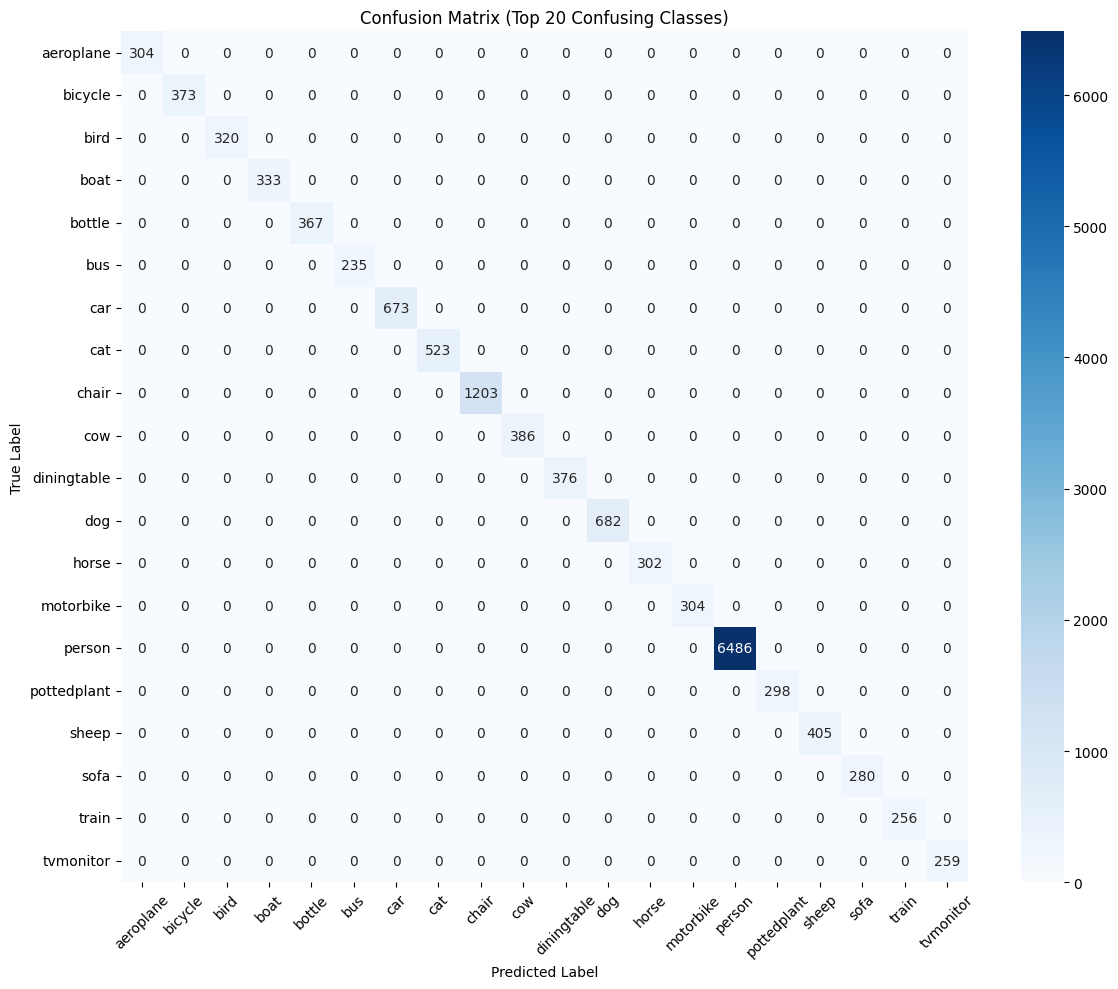

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_names = best_model.names

cm = confusion_matrix(y_true, y_pred, labels=range(len(class_names)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Tính tổng số lỗi (ngoài đường chéo) của từng lớp
errors = np.sum(cm, axis=1) - np.diag(cm)

# Lấy top-n lớp có nhiều lỗi nhất
top_n = 20
top_classes_idx = np.argsort(errors)[-top_n:]
top_cm = cm[top_classes_idx][:, top_classes_idx]
top_labels = [class_names[i] for i in top_classes_idx]

plt.figure(figsize=(12, 10))
sns.heatmap(top_cm, annot=True, fmt='d', xticklabels=top_labels, yticklabels=top_labels, cmap='Blues')
plt.title(f"Confusion Matrix (Top {top_n} Confusing Classes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Lưu ảnh
fig.savefig('/content/drive/MyDrive/Computer-vision-(TGMT & UD)/Final (CK)/Model-save/yolo_evaluation_metrics_confusion_matrix.png', bbox_inches='tight')